##### Copyright 2018 The TensorFlow Authors.

**Finding K Optimal Value**

Dataset link - https://raw.githubusercontent.com/VijayShanmugan/Datasets/main/collegePlace.csv 

In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/VijayShanmugan/Datasets/main/collegePlace.csv')
df.head()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,1,8,1,1,1
1,21,0,0,7,1,1,1
2,22,0,1,6,0,0,1
3,21,1,0,8,0,1,1
4,22,1,0,8,1,0,1


In [12]:
df.columns, df.shape

(Index(['Age', 'Gender', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
        'PlacedOrNot'],
       dtype='object'), (2966, 7))

In [13]:
df['CGPA'].value_counts()

7    956
8    915
6    834
9    165
5     96
Name: CGPA, dtype: int64

In [14]:
X = df.drop(['CGPA'], axis = 1)
X.head()

,Age,Gender,Internships,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,1,1,1,1
1,21,0,0,1,1,1
2,22,0,1,0,0,1
3,21,1,0,0,1,1
4,22,1,0,1,0,1


In [15]:
y = df['CGPA']
y.head()

0    8
1    7
2    6
3    8
4    8
Name: CGPA, dtype: int64

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2372, 6) (2372,)
Test set: (594, 6) (594,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)

In [19]:
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.4781144781144781


In [20]:
Pred_y

array([8, 8, 8, 6, 8, 6, 6, 8, 7, 6, 6, 6, 7, 6, 7, 6, 6, 8, 7, 7, 7, 6,
       7, 7, 6, 8, 8, 6, 8, 6, 8, 6, 7, 6, 8, 8, 8, 7, 7, 7, 6, 8, 6, 8,
       6, 7, 6, 8, 7, 5, 6, 7, 7, 6, 6, 7, 6, 6, 8, 6, 7, 8, 7, 7, 6, 6,
       6, 8, 8, 7, 7, 8, 8, 8, 6, 7, 8, 7, 6, 7, 6, 8, 6, 6, 6, 6, 7, 7,
       8, 6, 6, 8, 8, 6, 8, 7, 6, 7, 6, 6, 7, 8, 8, 7, 8, 8, 7, 6, 6, 8,
       7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 6, 6, 8, 8, 7, 8, 6, 6, 8, 8, 6, 7,
       6, 7, 8, 8, 6, 7, 7, 8, 8, 6, 7, 8, 8, 7, 7, 8, 6, 6, 8, 8, 6, 7,
       6, 8, 7, 6, 8, 7, 8, 6, 8, 6, 6, 7, 7, 7, 7, 6, 8, 7, 6, 8, 6, 6,
       7, 7, 6, 8, 7, 8, 6, 8, 7, 7, 8, 8, 6, 7, 8, 7, 6, 6, 8, 8, 8, 6,
       8, 8, 6, 8, 6, 6, 8, 6, 7, 8, 8, 6, 6, 7, 8, 8, 6, 7, 6, 8, 8, 8,
       7, 8, 8, 8, 6, 8, 6, 6, 8, 7, 7, 7, 8, 6, 9, 8, 8, 8, 6, 6, 6, 8,
       8, 7, 8, 8, 7, 8, 6, 6, 8, 6, 8, 6, 8, 7, 8, 6, 6, 6, 7, 8, 8, 8,
       6, 8, 6, 6, 7, 6, 8, 6, 7, 7, 8, 8, 8, 7, 6, 5, 8, 7, 6, 8, 6, 6,
       6, 8, 8, 6, 7, 5, 8, 8, 7, 8, 6, 7, 7, 7, 8,

Minimum error:- 0.4562289562289562 at K = 28


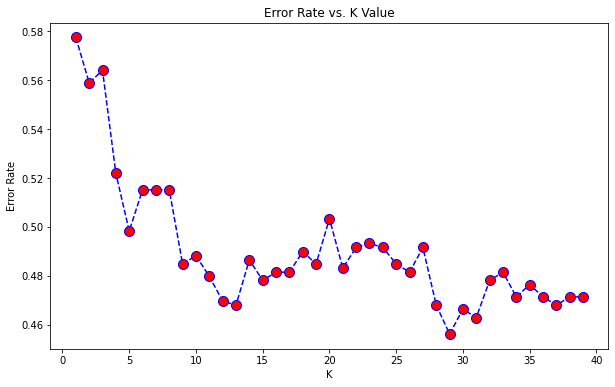

In [21]:
Ks = 40
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [22]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.5437710437710438 at K = 28


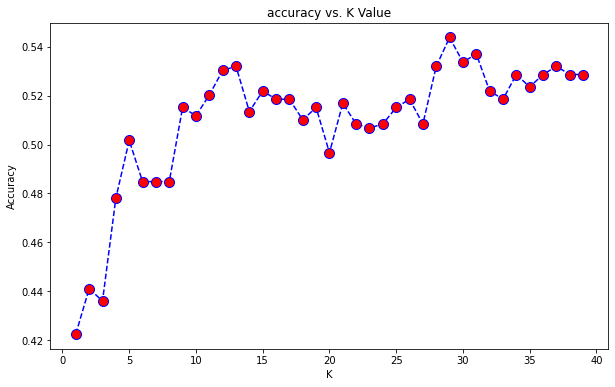

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

**CONCLUSION: OPTIMAL K VALUE FOR THE GIVEN DATASET - 28**